# Seasonal ARIMA Models


In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  pmdarima as pm
import joblib

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Seasonal time series
Сезонные данные
     - Имеет предсказуемые и повторяющиеся шаблоны
     - Повторяется через любое количество времени
- Сезонное разложение
     - временной ряд = тренд + сезонность + остатки

### Seasonal decompose
Вы можете представить себе временной ряд как состоящий из трендовых, сезонных и остаточных компонентов. Это может быть хорошим способом подумать о данных, когда вы приступите к их моделированию. Если вы знаете период временного ряда, вы можете разложить его на эти компоненты.

В этом упражнении вы разложите временной ряд, показывающий ежемесячное производство молока на одну корову в США. Это даст вам более четкое представление о тренде и сезонном цикле. Поскольку данные ежемесячные, вы можете догадаться, что сезонность может составлять 12 периодов времени, однако это не всегда так.

#### Загрузка данных

In [3]:
milk_production = pd.read_csv('data/milk_production.csv', index_col='Month', parse_dates=True)
milk_production.columns = ['_','pounds_per_cow']
#milk_production = milk_production.asfreq('MS')
milk_production.head()

,_,pounds_per_cow
Month,,
1962-01-01,0,589
1962-02-01,1,561
1962-03-01,2,640
1962-04-01,3,656
1962-05-01,4,727


<AxesSubplot:xlabel='Month'>

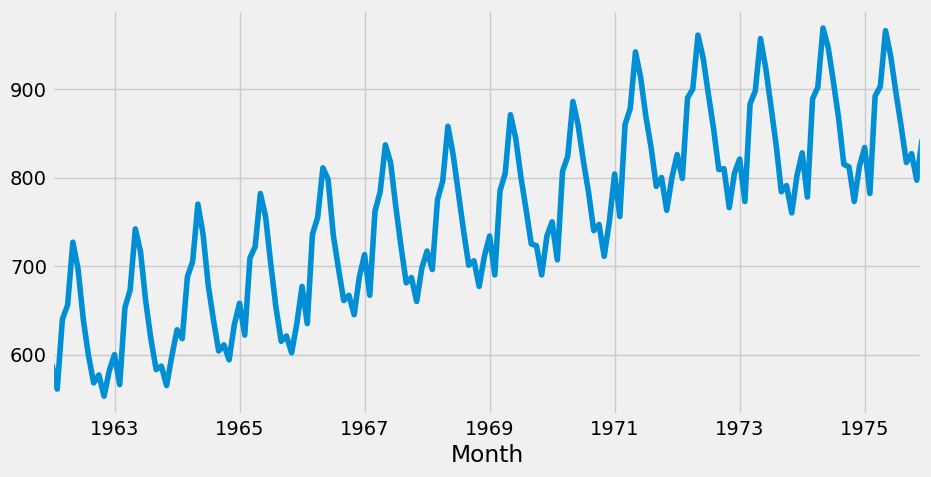

In [4]:
milk_production.pounds_per_cow.plot()

#### Декомпозиция сезонности

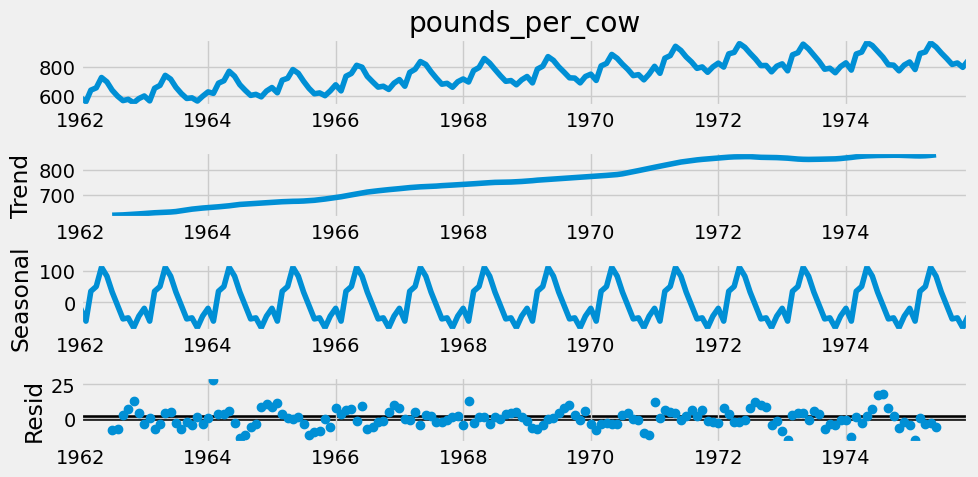

In [5]:
# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot()
plt.tight_layout()
# 1. Исходные данные 
# 2. Тренд         - Trend
# 3. Сезональность - Seasonal
# 4. Остатки       - Resid

## SARIMA models
- Seasonal ARIMA = SARIMA
$$ \text{SARIMA}(p, d, q)(P, D, Q)_S $$
    - Non-seasonal orders
        - p: autoregressive order               - сколько шагов назад берется для построения предсказания
        - d: differencing order                 - наличие тренда: 0 - нет, 1 - линейный, 2+ - нелинейный
        - q: moving average order               - сколько шагов назад берется для создания скользящего окна
    - Seasonal orders
        - P: seasonal autoregressive order      - длина повторяющегося паттерна
        - D: seasonal differencing order        - наличие тренда: 0 - нет, 1 - линейный, 2+ - нелинейный
        - Q: seasonal moving average order      - сколько шагов назад берется для создания скользящего окна
        - S: Number of time steps per cycle
- The SARIMA model
    - ARIMA(2, 0, 1) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + m_1 \epsilon_{t-1} + \epsilon_t $$
    - $\text{SARIMA}(0,0,0)(2, 0, 1)_7$ model:
$$ y_t = a_7 y_{t-7} + a_{14} y_{t-14} + m_y \epsilon_{t-7} + \epsilon_t $$

- Seasonal differencing
    - Subtract the time series value of one season ago
$$ \Delta y_t = y_t - y_{t-S} $$

### The SARIMAX model

**S** - seasonal\
**AR** - AutoRegressive\
**I** - Integrated\
**MA** - Moving Average\
**X** - Exogenous


### Загрузка данных 

In [26]:
df1 = pd.read_csv('data/AirPassengers.csv', index_col=0, parse_dates=True)
df1

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

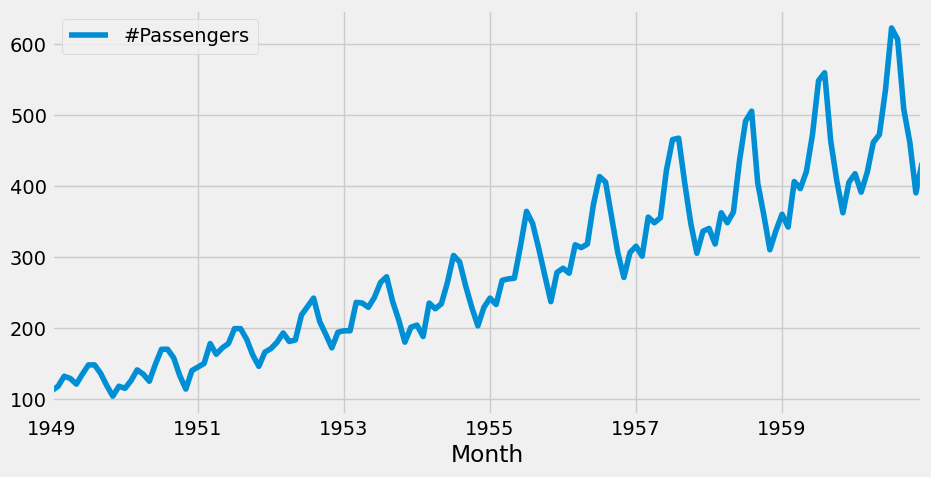

In [27]:
df1.plot()

### Обучение SARIMA 

In [35]:
# Create a SARIMAX model
model = SARIMAX(df1, 
                order=(2, 2, 1), # несезональные параметры
                seasonal_order=(1, 0, 1, 7)) # сезональные параметры
#model = SARIMAX(df1, exog=[<feature list>], endog=['Pannangers'] order=(1, 1, 1), seasonal_order=(1, 0, 1, 7))

# Fit the model
results = model.fit()
#results = model.fit(method='bfgs')

# Print the results summary
results.summary()

c:\Users\leysh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\leysh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\leysh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 2, 1)x(1, 0, 1, 7)   Log Likelihood                -688.868
Date:                           Sat, 22 Oct 2022   AIC                           1389.737
Time:                                   23:38:05   BIC                           1407.471
Sample:                               01-01-1949   HQIC                          1396.943
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4342      0.107      4.057      0.000       0.224       0.644
ar.L2         -0.1943      0.085     -2.292      0.022      -0.361      -0.028
ma.L1         -0.9999     12.991     -0.077      0.939     -26.461      24.461
ar.S.L7       -0.7362      0.229     -3.221      0.001      -1.184      -0.288
ma.S.L7        0.9994     20.547      0.049      0.961     -39.272      41.271
sigma2       866.8234   1.66e+04      0.052      0.958   -3.16e+04    3.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.71   Prob(JB):                         0.98
Heteroskedasticity (H):               7.93   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Выбор параметров SARIMA order


### Загрузка данных 

In [37]:
aus_employment = pd.read_csv('data/aus_employment.csv', index_col='date', parse_dates=True)
aus_employment = aus_employment.asfreq('MS')
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


<AxesSubplot:xlabel='date'>

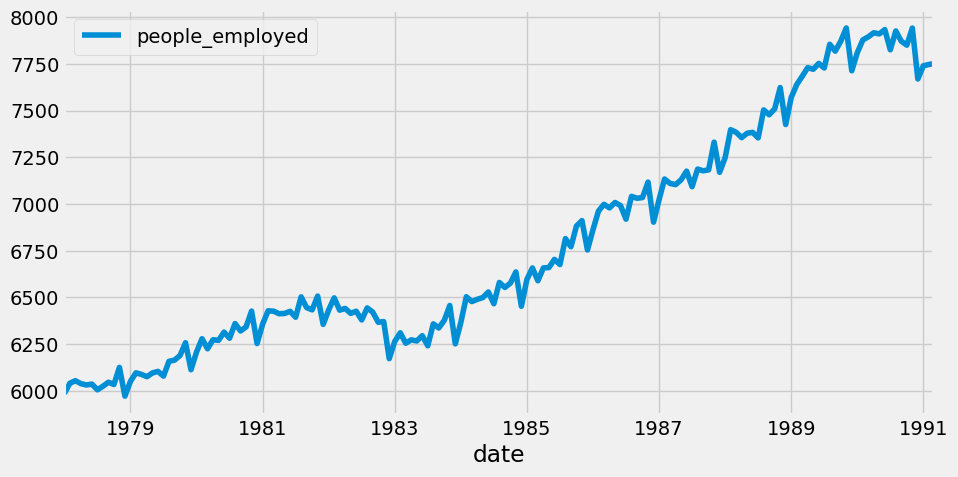

In [38]:
aus_employment.plot()

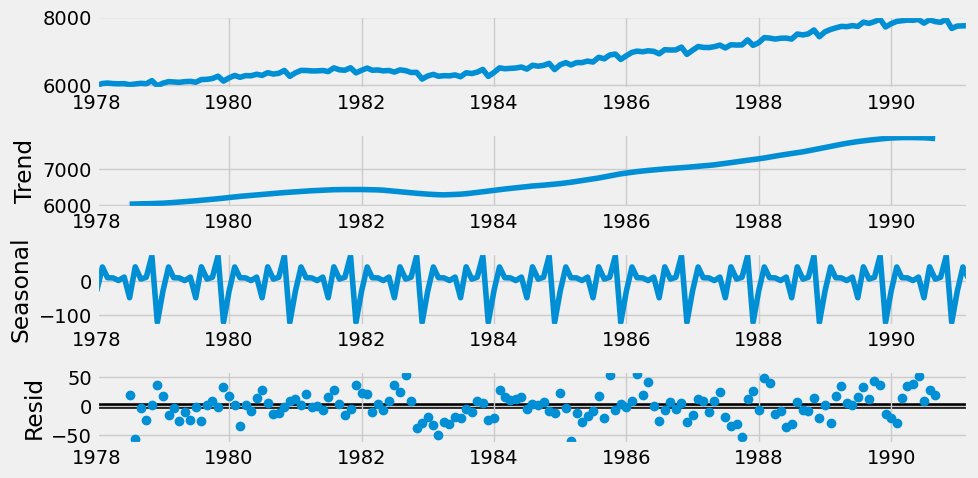

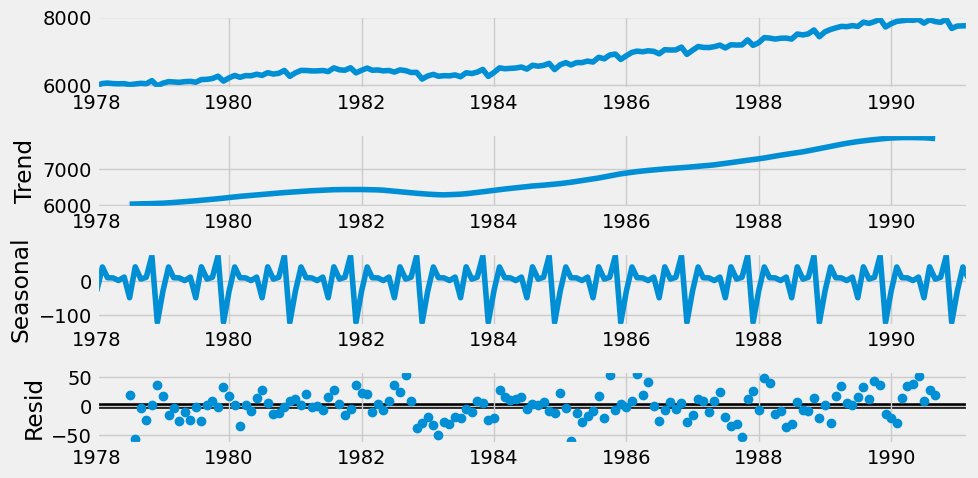

In [20]:
# Perform additive decomposition
decomp = seasonal_decompose(aus_employment, period=12)

# Plot decomposition
decomp.plot()

### Очистка данных от сезональности и тренда

<AxesSubplot:xlabel='date'>

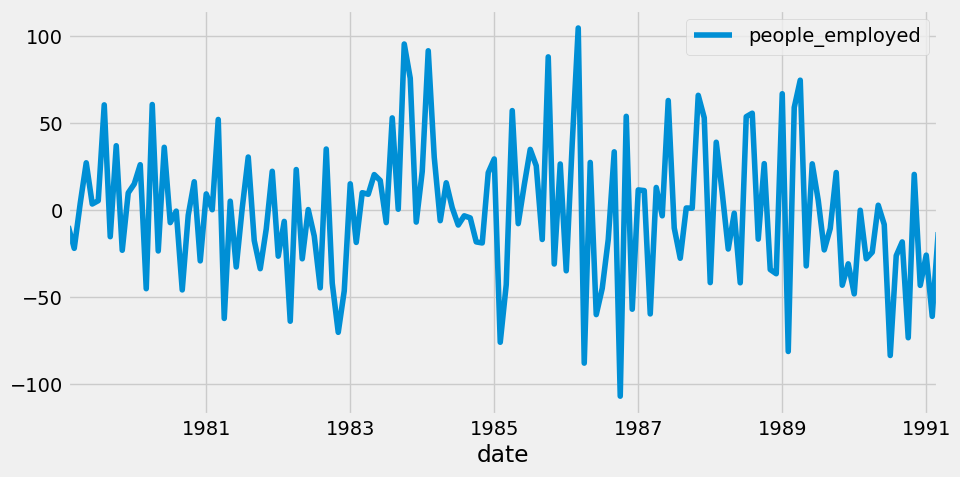

In [39]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff() # убираем тренд
aus_employment_diff = aus_employment_diff.diff(12) # убираем сезональность
aus_employment_diff = aus_employment_diff.dropna() # убираем начальные NA от сдвига на 12

aus_employment_diff.plot()

### Несезональная модель

c:\Users\leysh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


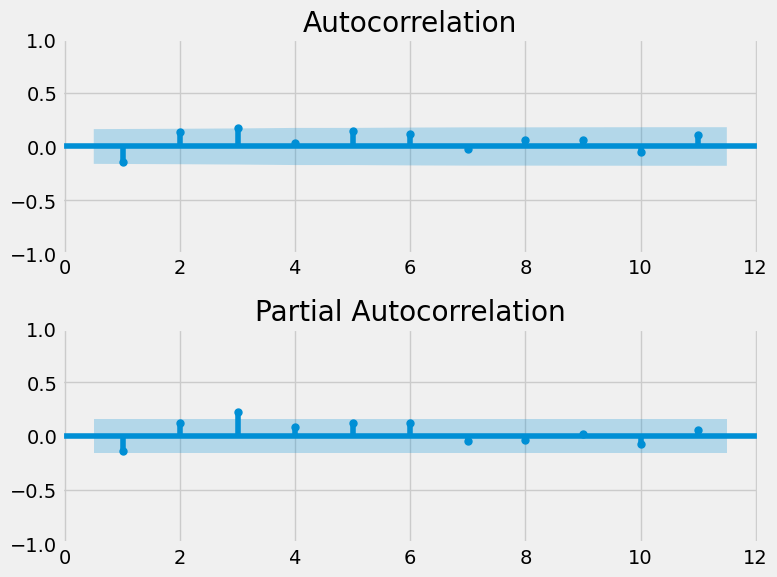

In [22]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2)
plt.tight_layout()

В автокорреляции ни один лаг не выделяется значит компонента (p: autoregressive order): p = от 0 до 5 

В частичной автокорреляции один лаг выделился значит компонента (q: moving average order): q = от 1 до 2

### Сезональная модель

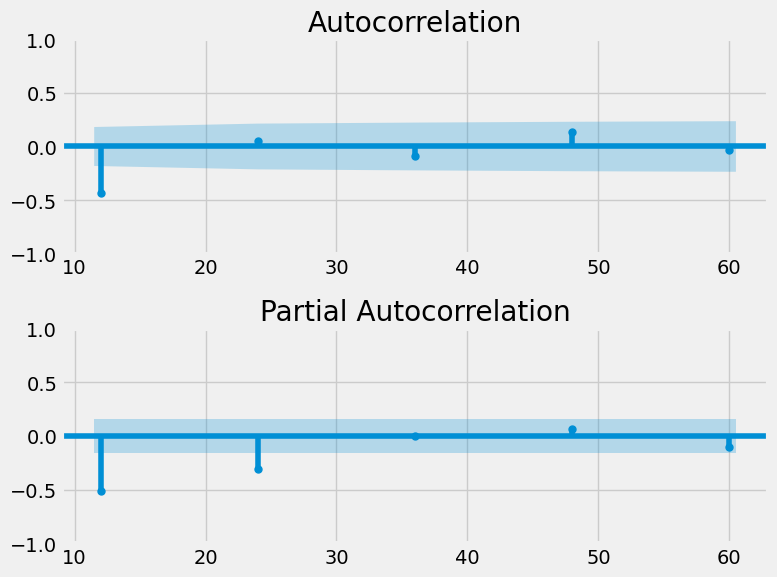

In [23]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2)
plt.tight_layout()

В автокорреляции ни один лаг не выделяется значит компонента (p: autoregressive order): p = от 1 до 5 

В частичной автокорреляции один лаг выделился значит компонента (q: moving average order): q = от 2 до 4

### Попробуем применить значения полученные при анализе выше
Несезонный ACF не показывает ни одного из обычных шаблонов моделей MA, AR или ARMA, поэтому мы не выбираем ни один из них. Seaosnal ACF и PACF выглядят как модель MA(1). : $\text{SARIMAX}(0,1,0)(0,1,1)_{12}$

In [46]:
# Create a SARIMAX model
model = SARIMAX(aus_employment_diff, order=(1, 1, 2), seasonal_order=(1, 0, 2, 12))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

c:\Users\leysh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    people_employed   No. Observations:                  146
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -709.177
Date:                            Sat, 22 Oct 2022   AIC                           1432.354
Time:                                    23:57:46   BIC                           1453.191
Sample:                                02-01-1979   HQIC                          1440.820
                                     - 03-01-1991                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0525      0.271      0.194      0.846      -0.478       0.583
ma.L1         -1.1941      0.260     -4.587      0.000      -1.704      -0.684
ma.L2          0.3612      0.229      1.580      0.114      -0.087       0.809
ar.S.L12      -0.9796      0.535     -1.830      0.067      -2.028       0.069
ma.S.L12       0.2712      0.670      0.405      0.686      -1.042       1.584
ma.S.L24      -0.6578      0.517     -1.272      0.203      -1.671       0.355
sigma2       966.6020    168.026      5.753      0.000     637.277    1295.927
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.91   Prob(JB):                         0.62
Heteroskedasticity (H):               1.58   Skew:                             0.13
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
results.predict()

1949-01-01      0.186850
1949-02-01    112.184363
1949-03-01    118.187177
1949-04-01    132.186158
1949-05-01    129.187154
                 ...    
1960-08-01    629.273076
1960-09-01    518.124674
1960-10-01    454.413650
1960-11-01    413.605781
1960-12-01    439.258403
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [47]:
results.forecast(steps=10)

1991-04-01   -52.000319
1991-05-01   -29.734600
1991-06-01   -37.493579
1991-07-01     7.239566
1991-08-01   -22.162719
1991-09-01   -20.536657
1991-10-01     3.674214
1991-11-01   -41.195809
1991-12-01    14.903509
1992-01-01   -15.276802
Freq: MS, Name: predicted_mean, dtype: float64

## Automated model selection
Пакет «pmdarima» — это мощный инструмент, который поможет вам выбрать параметры модели. 

Помните, что хотя автоматизация обладает мощными возможностями, иногда она может совершать ошибки, которых вы бы не заметили. Трудно предположить, как входные данные могут быть несовершенными и это может повлиять на результаты теста.


In [50]:
# Create auto_arima model
model1 = pm.auto_arima(aus_employment_diff,
                      seasonal=True, m=24,  # есть ли сезональность, размер сезональности
                      d=0, D=1,             # нужно ли дифференцировать данные (убрать (d)локальный, (D)глобальный тренд)
                      max_p=5, max_q=5,     # сколько вариантов перебирать (от 0 до N)
                      trace=True,           # вывод лога каждой итерации
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[24] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=1332.047, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=1295.240, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=1330.775, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=1332.407, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=1292.760, Time=1.41 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=3.25 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=1292.756, Time=0.99 sec
 ARIMA(0,0,0)(1,1,0)[24] intercept   : AIC=1295.321, Time=0.28 sec
 ARIMA(0,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(0,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,1)(2,1,0)[24] intercept   : AIC=1293.034, Time=1.25 sec
 ARIMA(1,0,1)(2,1,0)[24] intercept   : AIC=1296.2

## Saving and updating models
После того, как вы получили модель, которая вас устраивает, вы захотите сохранить эту модель, а также включить новые измерения, когда они будут доступны. Это ключевая часть запуска модели в производство.


In [30]:
# Set model name
filename='candy_model.pkl'

# Pickle it
joblib.dump(model1, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  146
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 24)   Log Likelihood                -659.849
Date:                              Sat, 22 Oct 2022   AIC                           1327.698
Time:                                      23:06:08   BIC                           1338.882
Sample:                                  02-01-1979   HQIC                          1332.240
                                       - 03-01-1991                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5824      0.081     -7.180      0.000      -0.741      -0.423
ar.S.L24      -0.0650      0.172     -0.379      0.705      -0.402       0.272
ma.S.L24      -0.7422      0.307     -2.415      0.016      -1.345      -0.140
sigma2      2681.9870    501.621      5.347      0.000    1698.828    3665.146
===================================================================================
Ljung-Box (L1) (Q):                  10.31   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.00   Prob(JB):                         0.27
Heteroskedasticity (H):               1.18   Skew:                            -0.24
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMA model diagnostics


In [51]:
# Create model object
model = SARIMAX(df1, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')

# Fit model
results = model.fit()
results.summary()

c:\Users\leysh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\leysh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.412
Date:                            Sun, 23 Oct 2022   AIC                           1024.824
Time:                                    00:10:07   BIC                           1039.200
Sample:                                01-01-1949   HQIC                          1030.665
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2309      0.868      0.266      0.790      -1.471       1.933
ar.L1         -0.2357      0.397     -0.594      0.552      -1.013       0.541
ma.L1         -0.0668      0.375     -0.178      0.859      -0.802       0.669
ma.S.L12      -0.1046      0.095     -1.097      0.273      -0.291       0.082
sigma2       135.2498     15.262      8.862      0.000     105.336     165.163
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.81
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.56   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

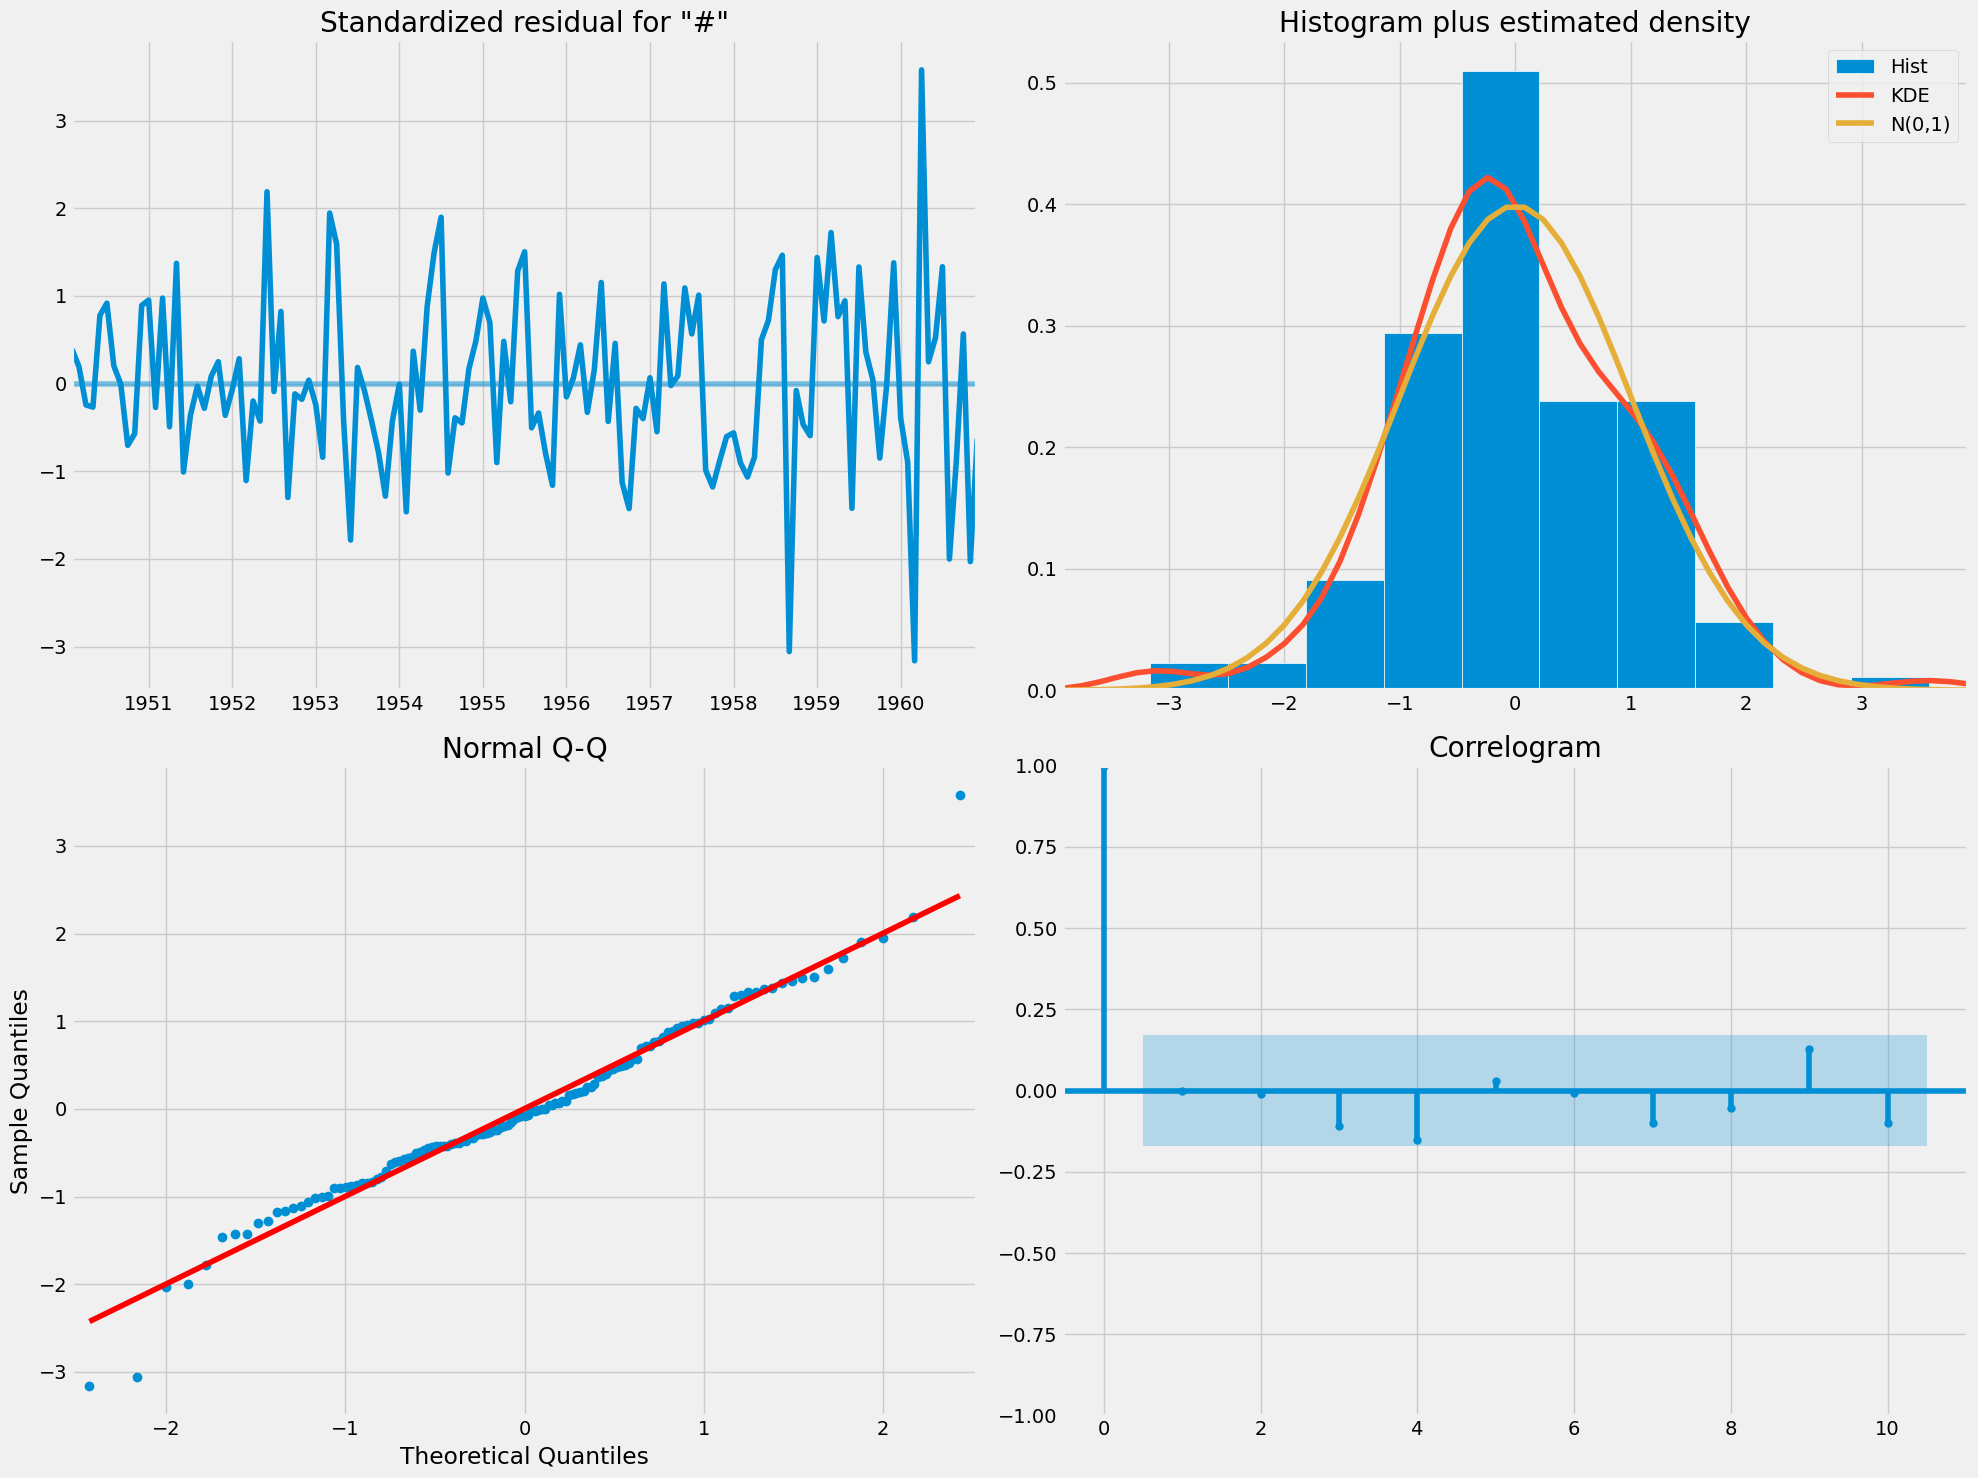

In [52]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

# Standartized residual - остатки модели, модель обучена хорошо если нет повторяющегося шаблона в графике